## Embedding 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simple 2D example of embedding vectors
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

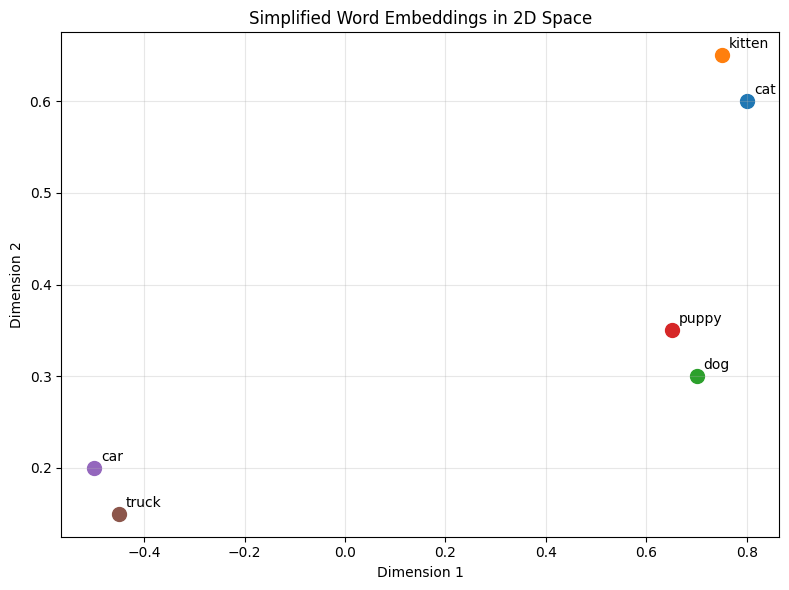

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):

    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    return dot_product / (norm_vec1 * norm_vec2)

In [5]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

In [6]:
cat_kitten_sim = cosine_similarity(cat_vector, kitten_vector)
print(cat_kitten_sim)

0.9966186334192181


In [7]:
cosine_similarity(cat_vector, car_vector)

np.float64(-0.43718588548916804)

## HuggingFace Embedding

In [8]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

/Users/beniaminenahid/Documents/Github_Repo/Retrieval_Augmented_Generation_RAG/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [9]:
# generate first embedding
text = "I love programming in Python."

embedding = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Length of embedding vector: {len(embedding)}")
print(embedding)


Text: I love programming in Python.
Length of embedding vector: 384
[-0.05761704593896866, 0.004262273199856281, -0.028153125196695328, 0.02519758604466915, -0.01650560460984707, -0.1773674339056015, 0.008361932821571827, 0.07995728403329849, -0.0127755431458354, 0.030968770384788513, -0.06119596213102341, 0.04324905201792717, 0.057725392282009125, 0.03860897570848465, 0.06398425996303558, -0.03220921754837036, -0.09853547066450119, -0.011203547939658165, 0.03873400017619133, -0.13676868379116058, -0.09101399779319763, 0.0386880561709404, -0.0030839170794934034, -0.0019542367663234472, 0.03219810873270035, -0.012075014412403107, 0.010174613445997238, -0.02687622793018818, -0.01969327963888645, -0.05766361206769943, -0.08681893348693848, 0.12009260803461075, 0.03700999170541763, 0.03542623668909073, 0.005967879667878151, 0.05939224734902382, 0.04013896360993385, -0.06003228947520256, -0.01643536239862442, 0.0328885093331337, -0.04534770920872688, 0.05807153135538101, -0.0012867153855040

In [10]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embeddings.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018348455429, -0.011870156042277813, -0.028116997331380844, 0.051238544285297394, -0.055974505841732025, 0.03019152767956257, 0.030161302536725998, 0.024698294699192047, -0.01837053894996643, 0.05876684561371803, -0.024953141808509827, 0.06015419960021973, 0.03983170911669731, 0.033230509608983994, -0.06131141632795334, -0.04937310889363289, -0.05486347898840904, -0.04007610306143761, 0.05642913281917572, 0.039156604558229446, -0.03473712131381035, -0.013247719034552574, 0.03196623548865318, -0.06349916756153107, -0.06017857789993286, 0.07823452353477478, -0.028303835541009903, -0.047442808747291565, 0.040359318256378174, -0.0066309357061982155, -0.0667409673333168, -0.004191323649138212, -0.02531169168651104, 0.05334161967039108, 0.017428051680326462, -0.0979236364364624, 0.006061263382434845, -0.06524164229631424, 0.045572586357593536, 0.023641834035515785, 0.07658474892377853, -0.010264388285577297, -0.004076812416315079, -0.062322795391082764, 0.03370519354939461, 0.01866113

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

